### Business Data Analytics and Prediction
*Dr. Gilli Shama*

## Lesson 1.4 Classify employees that are at attrition risk 

In lesson 3 we prepared the data of attrition to a machine leanring project. In this lesson we will predict if employees will leave the company. This is a classification prediction.

As before, we have all imports on the top:
* In this lesson we will use pandas and numpy to read and manipulate data
* We will use matplotlib and seaborn to visualize 
* We will use pickle to both start this lesson in reading the data we prepared last lesson, and to save our produced model
* We will import several modules from sklearn for various machine learning classification models and evaluation. These modules will be imported in their chapter for the convinience of learning

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import pickle

# move all imports here from the chapters, when done

### 1. Read the prepared data sets

Lets first read the data we saved in a pickle file on previous session. The algorithm that we will study today dont need normalized data, neither a normal distribution. That is we can use the light data preprocessing.

In [2]:
train_df = pickle.load(open("../Lesson0103/train_df.dat", "rb")) #note to call the file from correct folder
test_df = pickle.load(open("../Lesson0103/test_df.dat", "rb"))

In [3]:
train_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical,time_spend_company_log
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,0.611717,0.716795,3.810651,201.333528,3.505542,0.140845,0.240687,0.021835,0.593549,0.081257,0.052921,0.052588,0.047087,0.043087,0.058505,0.058755,0.274190,0.149012,0.182599,1.183521
std,0.249096,0.171054,1.237230,50.078128,1.463889,0.347876,0.427518,0.146151,0.639372,0.273240,0.223885,0.223218,0.211834,0.203061,0.234705,0.235175,0.446124,0.356116,0.386353,0.363495
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612
50%,0.640000,0.720000,4.000000,201.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.386294
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.302585


In [4]:
test_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,job_IT,job_RandD,job_accounting,job_hr,job_management,job_marketing,job_product_mng,job_sales,job_support,job_technical,time_spend_company_log
count,3000.00000,3000.000000,3000.000000,3000.000000,3000.0000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.61730,0.713330,3.772667,199.917667,3.4690,0.159667,0.227667,0.019000,0.599333,0.084000,0.050667,0.045333,0.058000,0.037667,0.052000,0.065667,0.283333,0.147000,0.176333,1.174416
std,0.24675,0.171631,1.213594,49.391383,1.4449,0.366358,0.419396,0.136547,0.628436,0.277434,0.219353,0.208069,0.233782,0.190421,0.222064,0.247740,0.450692,0.354165,0.381167,0.358885
min,0.09000,0.360000,2.000000,96.000000,2.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147
25%,0.44000,0.550000,3.000000,156.000000,3.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612
50%,0.66000,0.720000,4.000000,198.000000,3.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.098612
75%,0.82000,0.870000,5.000000,244.000000,4.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.386294
max,1.00000,1.000000,7.000000,310.000000,10.0000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.302585


In [5]:
y = train_df["left"]
X = train_df.drop("left", axis = 1)
X= X.drop("time_spend_company_log", axis = 1) # Trees do no require normal distribution, so we will keep time for clarity
X2 = train_df[["satisfaction_level", "time_spend_company" ]] # These are the 2 most important features by EDA
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 14842 to 12463
Data columns (total 2 columns):
satisfaction_level    11999 non-null float64
time_spend_company    11999 non-null int64
dtypes: float64(1), int64(1)
memory usage: 281.2 KB


### 2. Classification decision trees 
This exercise can be learned from chapter 6 on the course book.

In [6]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier (max_depth = 2)
tree_clf.fit (X2, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

We have created a decision tree that can predict y with two features. Lets try to see it.

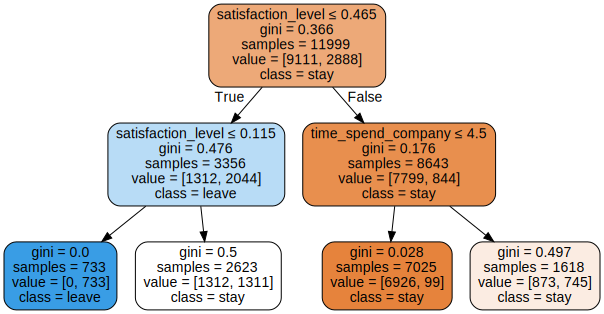

In [7]:
from sklearn.tree import export_graphviz #In the cmd line type: conda install python-graphviz
import graphviz

dot_data = export_graphviz(tree_clf, out_file = None, 
                           feature_names = ["satisfaction_level", "time_spend_company" ], 
                           class_names = ["stay", "leave" ],
                           rounded = True, filled=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 

In [8]:
tree_clf.predict([[0.1,3]]) #This is a veteran employee that is disatisfied form his company

array([1], dtype=int64)

In [9]:
tree_clf.predict([[0.1,0.3]]) #This is a new employee that is disatisfied form his company

array([1], dtype=int64)

In [10]:
tree_clf.predict([[0.9,3]]) #This is a veteran employee that is satisfied form his company

array([0], dtype=int64)

In [11]:
tree_clf.predict_proba([[0.1,0.3]])

array([[0., 1.]])

In [12]:
tree_clf.predict_proba([[0.9,3]])

array([[0.98590747, 0.01409253]])

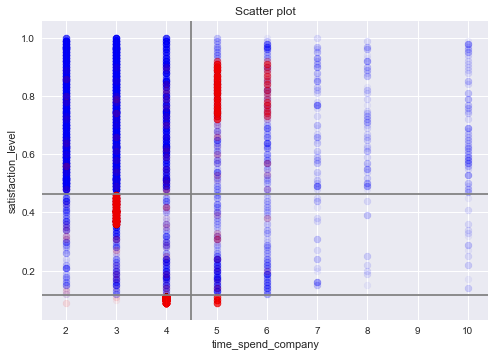

In [13]:
plt.scatter(data = train_df[train_df['left']==0], c="blue", x="time_spend_company" , y="satisfaction_level", alpha=0.05)
plt.scatter(data = train_df[train_df['left']==1], c="red", x="time_spend_company" , y="satisfaction_level", alpha=0.05)
plt.axhline(y=0.465, color="grey")
plt.axhline(y=0.115, color="grey")
plt.axvline(x=4.5, color="grey")
plt.title('Scatter plot')
plt.xlabel("time_spend_company")
plt.ylabel("satisfaction_level")
plt.show()

In [14]:
tree_clf_large = DecisionTreeClassifier ()
tree_clf_large.fit (X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

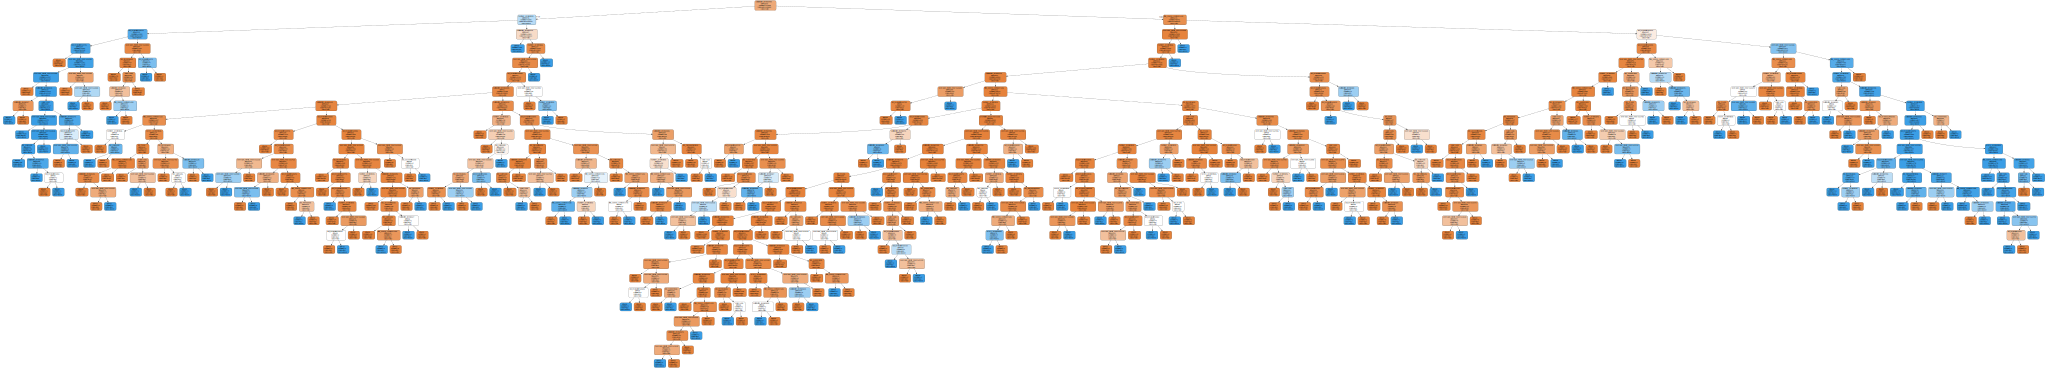

In [15]:
dot_data = export_graphviz(tree_clf_large, out_file = None, 
                           feature_names = list(X), 
                           class_names = ["stay", "leave" ],
                           rounded = True, filled=True, special_characters=True )
graph = graphviz.Source(dot_data ) 
graph 

### 3. Evaluate classification
This exercise can be learned from chapter 3 on the course book, page 85-93.
In this section you will:
* Draw a confusion matrix
* Calculate recall, precision and accuracy
* Select a threshold per recall and precision
* Compare AUC and ROC curves

#### 3.1. Draw a confusion matrix
Predict y with both trees we created and then compare the prediction to the actual data.  We can compare prediction to data both over test set and in the train set.

Lets start with the small tree.

In [16]:
y_test = test_df["left"]
X_test = test_df.drop("left", axis = 1)
X_test = X_test.drop("time_spend_company_log", axis = 1)
X2_test = test_df[["satisfaction_level", "time_spend_company" ]] # These are the 2 most important features by EDA

In [17]:
y2_test_predict = tree_clf.predict (X2_test)

In [18]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y2_test_predict)
conf_matrix

array([[2317,    0],
       [ 528,  155]], dtype=int64)

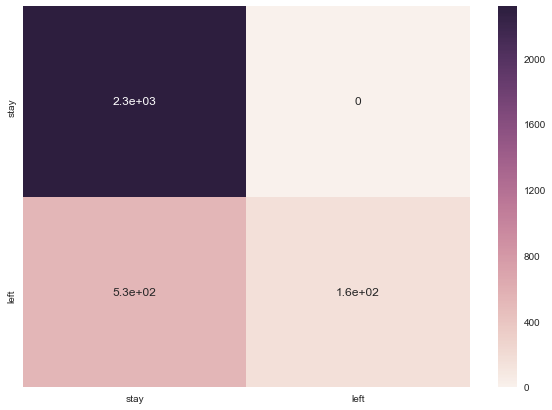

In [19]:
df_cm = pd.DataFrame(conf_matrix, index = [i for i in ["stay","left"]],
                  columns = [i for i in ["stay","left"]])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [20]:
confusion_matrix(y, tree_clf.predict (X2)) # Confusion matrix over the train set

array([[9111,    0],
       [2155,  733]], dtype=int64)

For the small tree there were many errors in prediction. Yet, the results for train data and for test data were similar. 

Now let's look on the large tree.

In [21]:
y_test_predict = tree_clf_large.predict (X_test)

In [22]:
confusion_matrix(y_test, y_test_predict)

array([[2269,   48],
       [  27,  656]], dtype=int64)

In [23]:
confusion_matrix(y, tree_clf_large.predict (X)) # Confusion matrix over the train set

array([[9111,    0],
       [   0, 2888]], dtype=int64)

The results for the test were good. Yet, the results for the train set are a perfect match with no errors. This is a clear indication for an overfit.

#### 3.2. Calculate recall, precision and accuracy

Let's compare the results of the trees on the same test data. 
First let's do it manualy, to understand the calculation:

* The recall for the small tree is 155/(155+528) = 0.22693997071742314
* The recall for the large tree is 658/(658+25) = 0.9633967789165446
* The precision for the small tree is 155/(155+0) = 1
* The precision for the large tree is 658/(658+47) = 0.9333333333333333

We can also calculate using a command:

In [24]:
from sklearn.metrics import precision_score, recall_score

print("The recall for the small tree is ",recall_score(y_test, y2_test_predict)) #small tree
print("The recall for the large tree is ",recall_score(y_test, y_test_predict))  #large tree
print("The precision for the small tree is ",precision_score(y_test, y2_test_predict)) #small tree
print("The precision for the large tree is ",precision_score(y_test, y_test_predict))  #large tree

The recall for the small tree is  0.22693997071742314
The recall for the large tree is  0.9604685212298683
The precision for the small tree is  1.0
The precision for the large tree is  0.9318181818181818


#### 3.3 Select a threshold per recall and precision

The comand we used before "tree_clf.predict_proba([[0.9,3]])" gives us probability that the result will be 1 or 0. We can define that the predicted result is 1, if the probability to 1 is above a threshold. The default threshold is 0.5. A higher threshold means that we will get results that we are more confident in and precision will rise, but recall will drop.

In [25]:
y2_test_proba = tree_clf.predict_proba(X2_test)
y2_test_proba[:,1]

array([0.46044499, 0.46044499, 0.01409253, ..., 0.01409253, 0.49980938,
       0.46044499])

In [26]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_true = y_test, probas_pred = y2_test_proba[:,1])
print(" Precision = ", precisions, "\n", "Recalls = ", recalls, "\n", "Thresholds = ", thresholds)

 Precision =  [0.22766667 0.54911839 0.58887545 1.         1.        ] 
 Recalls =  [1.         0.95754026 0.71303075 0.22693997 0.        ] 
 Thresholds =  [0.01409253 0.46044499 0.49980938 1.        ]


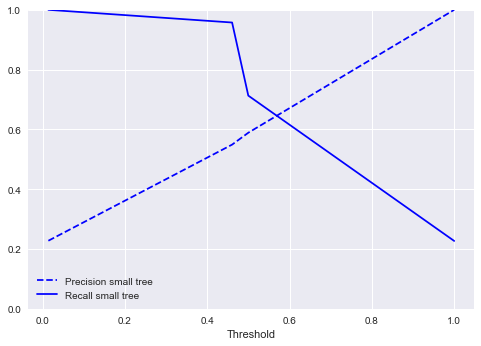

In [27]:
def plot_precision_recall_vs_threshold (precisions, recalls, thresholds, color = "k", label = None):
    plt.plot (thresholds, precisions[:-1], color+"--", label="Precision "+label)
    plt.plot (thresholds, recalls[:-1], color+"-", label="Recall "+label)
    plt.xlabel("Threshold")
    plt.legend(loc="upper right")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="small tree")
plt.legend(loc = "best")
plt.show()

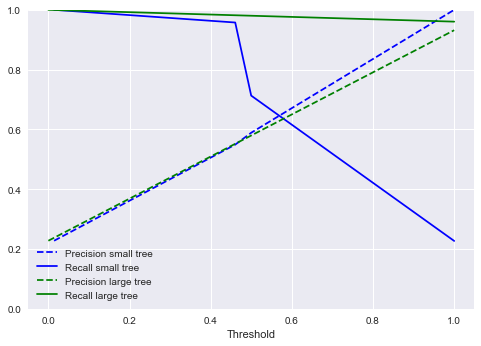

In [28]:
y_test_proba = tree_clf_large.predict_proba(X_test)
precisions_large, recalls_large, thresholds_large = precision_recall_curve(y_true = y_test, probas_pred = y_test_proba[:,1])
plot_precision_recall_vs_threshold( precisions, recalls, thresholds, color = "b", label="small tree")
plot_precision_recall_vs_threshold( precisions_large, recalls_large, thresholds_large, color = "g", label="large tree")
plt.legend(loc = "best")
plt.show()

#### 3.4. Compare AUC and ROC curves
Finaly let's draw the ROC curve and calculate the area below it. The closer AUC to 1, the better the model, regardless of selected threshold.

In [29]:
from sklearn.metrics import roc_curve

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y2_test_proba[:,1])

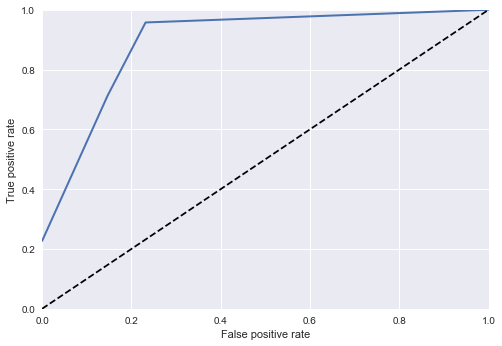

In [31]:
def plot_roc_curve (fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], [0,1], "k--")
    plt.axis([0,1,0,1])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    
plot_roc_curve (fpr, tpr, "small tree")
plt.show()

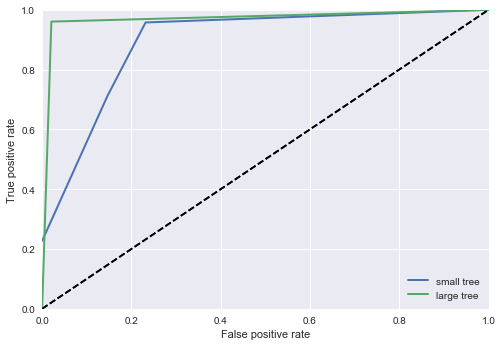

In [32]:
y_test_proba = tree_clf_large.predict_proba(X_test)
fpr_large, tpr_large, thresholds_large = roc_curve(y_test, y_test_proba[:,1])
plot_roc_curve (fpr, tpr, "small tree")
plot_roc_curve (fpr_large, tpr_large, "large tree")
plt.legend(loc = "best")
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
print("AUC for random guess is:   ", 0.5 )
print("AUC for the small tree is: ", roc_auc_score(y_test, y2_test_proba[:,1]) )
print("AUC for the large tree is: ", roc_auc_score(y_test, y_test_proba[:,1]) )

AUC for random guess is:    0.5
AUC for the small tree is:  0.8919107039382348
AUC for the large tree is:  0.9698760387763498


### 4. Random forest (RF), GBM and XGB
This section presents methods that are based on classification trees: RF, GBM, XGB.
#### 4.1. Random forest (RF)
This exercise can be learned from chapter 7 on the course book, pages 189-190.

In [34]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 2, n_jobs= -1)
rnd_clf.fit (X, y)
y_pred_rf = rnd_clf.predict(X_test)

C:\Users\gillis\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [35]:
confusion_matrix(y_test, y_pred_rf)

array([[2308,    9],
       [ 304,  379]], dtype=int64)

In [36]:
recall_score(y_test, y_pred_rf)

0.554904831625183

In [37]:
precision_score(y_test, y_pred_rf)

0.9768041237113402

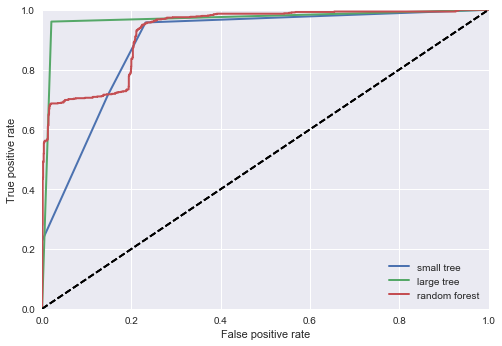

In [38]:
y_rf_proba = rnd_clf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_proba[:,1])
plot_roc_curve (fpr, tpr, "small tree")
plot_roc_curve (fpr_large, tpr_large, "large tree")
plot_roc_curve (fpr_rf, tpr_rf, "random forest")
plt.legend(loc = "best")
plt.show()

In [42]:
roc_auc_score(y_test, y_rf_proba[:,1])

0.9278374684283396

In [39]:
feature_score = rnd_clf.feature_importances_
feature_score

array([3.57095917e-01, 7.20993245e-02, 2.15488252e-01, 1.33573164e-01,
       1.42564449e-01, 3.82652341e-02, 9.29282557e-03, 2.25536614e-02,
       1.32737770e-04, 3.53866302e-03, 4.32797856e-04, 9.87977024e-04,
       3.30306101e-03, 1.20621043e-05, 3.41997313e-05, 9.02820861e-05,
       1.19852009e-04, 4.15539151e-04])

In [40]:
feature_names = list(X)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
df_feature_score

,feature,score
0,satisfaction_level,0.357096
2,number_project,0.215488
4,time_spend_company,0.142564
3,average_montly_hours,0.133573
1,last_evaluation,0.072099
5,Work_accident,0.038265
7,salary,0.022554
6,promotion_last_5years,0.009293
9,job_RandD,0.003539
12,job_management,0.003303


C:\Users\gillis\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


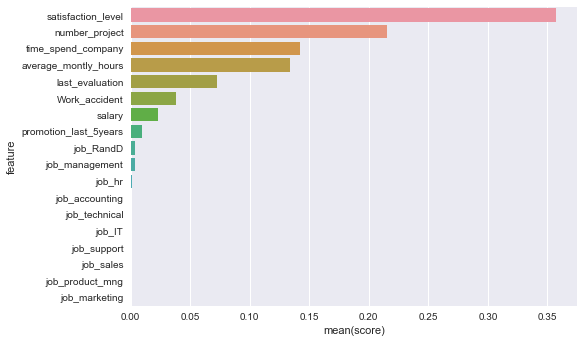

In [41]:
sns.barplot(y="feature", x="score", data=df_feature_score)

In [46]:
from sklearn import ensemble

clf_gb = ensemble.GradientBoostingClassifier()
clf_gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [47]:
y_pred_gb = clf_gb.predict(X_test)

In [54]:
confusion_matrix(y_test, y_pred_gb)

array([[2298,   19],
       [  55,  628]], dtype=int64)

In [55]:
recall_score(y_test, y_pred_gb)

0.9194729136163983

In [56]:
precision_score(y_test, y_pred_gb)

0.9706336939721792

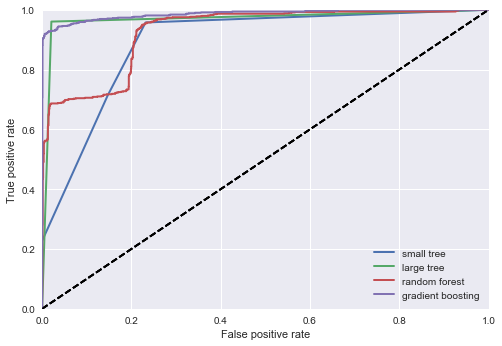

In [59]:
y_gb_proba = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_gb_proba[:,1])

plot_roc_curve (fpr, tpr, "small tree")
plot_roc_curve (fpr_large, tpr_large, "large tree")
plot_roc_curve (fpr_rf, tpr_rf, "random forest")
plot_roc_curve (fpr_gb, tpr_gb, "gradient boosting")
plt.legend(loc = "best")
plt.show()

In [60]:
roc_auc_score(y_test, y_gb_proba[:,1])

0.9864004104868782

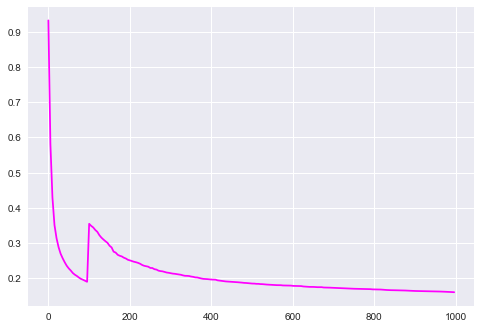

In [63]:
for i, y_pred in enumerate(clf_gb.staged_decision_function(X_test)):
    test_deviance[i] = clf_gb.loss_(y_test, y_pred)

plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5], '-', color=color, label=label)


C:\Users\gillis\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


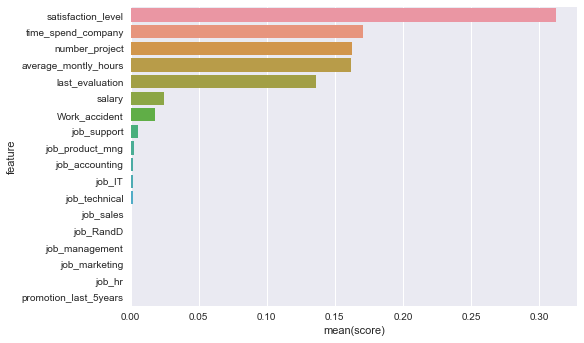

In [66]:
feature_score = clf_gb.feature_importances_

feature_names = list(X)
df_feature_score = pd.DataFrame(data=feature_names, columns=["feature"])
df_feature_score["score"]= feature_score
df_feature_score = df_feature_score.sort_values(by=['score'], ascending=False)
sns.barplot(y="feature", x="score", data=df_feature_score)